In [1]:
%matplotlib notebook        #import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read data from gallup webpage
tables=pd.read_html('https://news.gallup.com/poll/1690/religion.aspx')

In [64]:
#cleaning religious preference data
religious_preference=tables[0]
religious_preference.index=religious_preference.iloc[:,0]
religious_preference=religious_preference.iloc[:73,1:8]
religious_preference.rename_axis('year',axis=0,inplace=True)
religious_preference.replace('*',0.25,inplace=True)
religious_preference=religious_preference.astype('float')
religious_preference['sum']=religious_preference.sum(axis=1)
religious_preference=religious_preference.div(religious_preference['sum'],axis=0)*100
religious_preference=religious_preference.round(2)
# religious_preference.iloc[:,:7].to_excel('religious_preference.xlsx')

In [67]:
# plotting religious preference data
plot_religious_preference=pd.DataFrame(index=religious_preference.index)
plot_religious_preference['Christian']=religious_preference.iloc[:,0:3].sum(axis=1)
plot_religious_preference['Jewish']=religious_preference.iloc[:,3]
plot_religious_preference['Mormon']=religious_preference.iloc[:,4]
plot_religious_preference['Other']=religious_preference.iloc[:,5]
plot_religious_preference['None(Agnostic/Atheist)']=religious_preference.iloc[:,6]
plot_religious_preference.sort_index(inplace=True)
colors=['blue','green','yellow','cyan','red']
plt.cla()
i=-1
for col in plot_religious_preference.columns:
    i=i+1
    plt.plot(plot_religious_preference[col],color=colors[i],label=str(col))
plt.xticks(ticks=[2,12,22,32,42,52,62,72])
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Religious Preference of a Sample of U.S Population ')
plt.legend(loc='center left')
plt.savefig('preference.png', bbox_inches='tight')

In [68]:
#cleaning religion importance data
religion_importance=tables[1]
religion_importance.index=religion_importance.iloc[:,0]
religion_importance=religion_importance.iloc[:29,1:4]
religion_importance.rename_axis('year',axis=0,inplace=True)
religion_importance=religion_importance.astype('float')
religion_importance.sort_index(inplace=True)
# religion_importance.to_excel('religion_importance.xlsx')

<IPython.core.display.Javascript object>


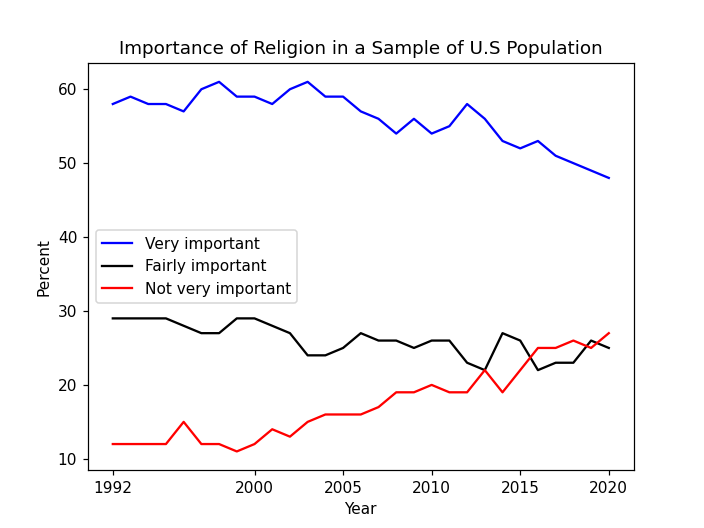

In [71]:
#plotting religion importance data
colors=['blue','black','red']
plt.cla()
i=-1
for col in religion_importance.columns:
    i=i+1
    plt.plot(religion_importance[col],color=colors[i],label=str(col)[2:-7])
plt.xticks(ticks=[0,8,13,18,23,28])
plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Importance of Religion in a Sample of U.S Population')
plt.legend(loc='center left')
plt.savefig('importance.png', bbox_inches='tight')